In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**outlier analysis**

In [25]:
visa_df=pd.read_csv(r"C:\Users\kisho\Documents\data set\Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
cat_column=visa_df.select_dtypes(include="object").columns
num_column=visa_df.select_dtypes(exclude="object").columns
num_column

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [5]:
visa_df[["prevailing_wage"]]

,prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,279174.7900
25477,146298.8500
25478,86154.7700


**box plot**

- is used to identify the outliers

- outlier is an observation having huge positive value or negetive value

- q1=25p,q2=50p,q3=75p

- IQR=inter quartile range=q3-q1

- q3+1.5iqr and q1-1.5iqr

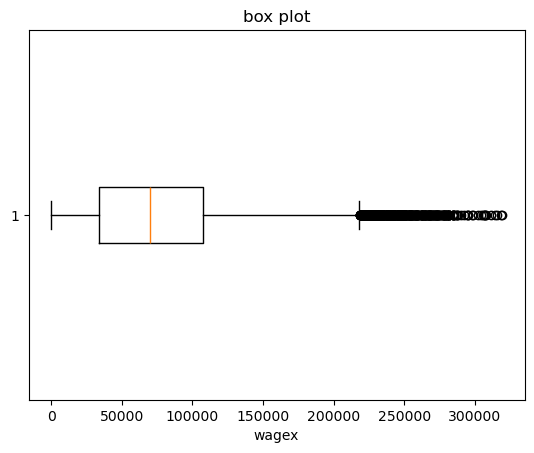

In [4]:
#read the data prevailing_wage data first and plot the box plot
plt.boxplot(visa_df["prevailing_wage"],vert=False)
plt.title("box plot")
plt.xlabel("wagex")
plt.show()

**by using seaborn**

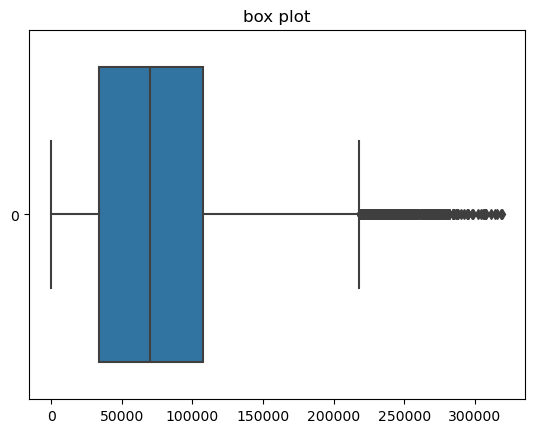

In [16]:
sns.boxplot(visa_df["prevailing_wage"],orient="h")
plt.title("box plot")
plt.show()

**plot the histogram and box plot**

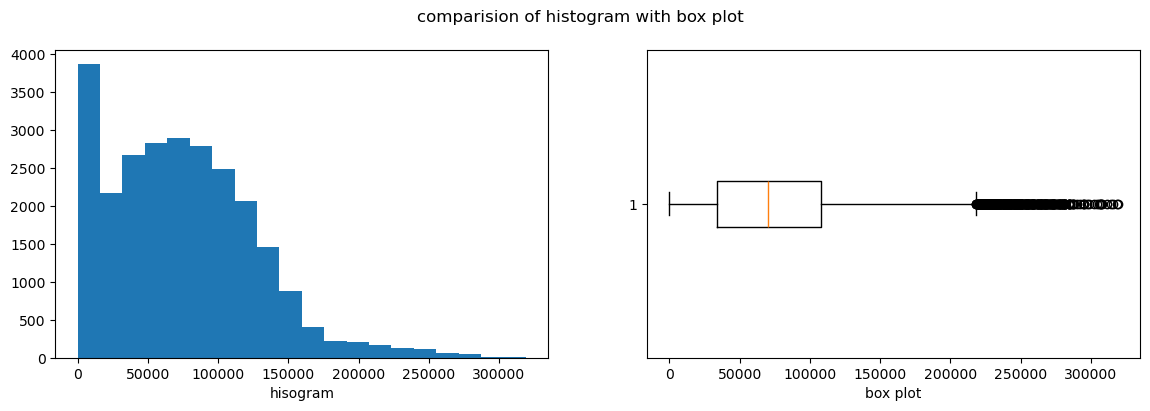

In [5]:
plt.figure(figsize=(14,4))
plt.suptitle("comparision of histogram with box plot")
plt.subplot(1,2,1).hist(visa_df["prevailing_wage"],bins=20)
plt.xlabel("hisogram")
plt.subplot(1,2,2).boxplot(visa_df["prevailing_wage"],vert=False)
plt.xlabel("box plot")
plt.show()

**finding outliers**

- we alredy know that outlier available lessthan q1-1.5iqr and q3+1.5iqr
- calculate
- step-1:
    - calculate q1=25p
    - calculate q2=50p
    - calculate q3=75p
 - staep-2:
   - calculate iqr=q3-q1
 - step-3:
     - calculate lb=q1-1.5*iqr
     - calculate ub=q3+1.5*iqr
 - step-4:
      - con1=wagedata<lb
      - con2=wagedata>ub
      - con3=con1 or con2
 - step-5:
       - data[con3]

In [6]:
q1=np.percentile(visa_df["prevailing_wage"],25)
q2=np.percentile(visa_df["prevailing_wage"],50)
q3=np.percentile(visa_df["prevailing_wage"],75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
con1=visa_df["prevailing_wage"]<lb
con2=visa_df["prevailing_wage"]>ub
con3=con1 ^ con2
outliers_wagedata=visa_df["prevailing_wage"][con3]
outliers_wagedata

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [55]:
#for  all data set
visa_df[con3]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


**non_outliers**

In [7]:
q1=np.percentile(visa_df["prevailing_wage"],25)
q2=np.percentile(visa_df["prevailing_wage"],50)
q3=np.percentile(visa_df["prevailing_wage"],75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
con1=visa_df["prevailing_wage"]>lb
con2=visa_df["prevailing_wage"]<ub
con3=con1 & con2
non_outliers_wagedata=visa_df["prevailing_wage"][con3]
non_outliers_wagedata
#non_outliers=visa_df[con3]
#len(non_outliers)

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

- we have two dataframe
- total data=25480
- non_outliers,(after removing outliers)=25053

**plot for non_outliers**

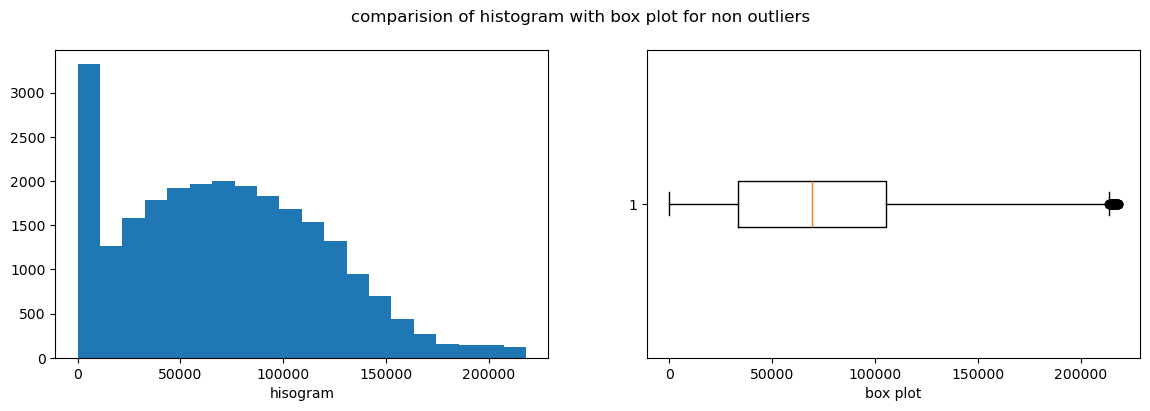

In [8]:
plt.figure(figsize=(14,4))
plt.suptitle("comparision of histogram with box plot for non outliers")
plt.subplot(1,2,1).hist(non_outliers_wagedata,bins=20)
plt.xlabel("hisogram")
plt.subplot(1,2,2).boxplot(non_outliers_wagedata,vert=False)
plt.xlabel("box plot")
plt.show()

**outliers and non_outliers of box and histogram**

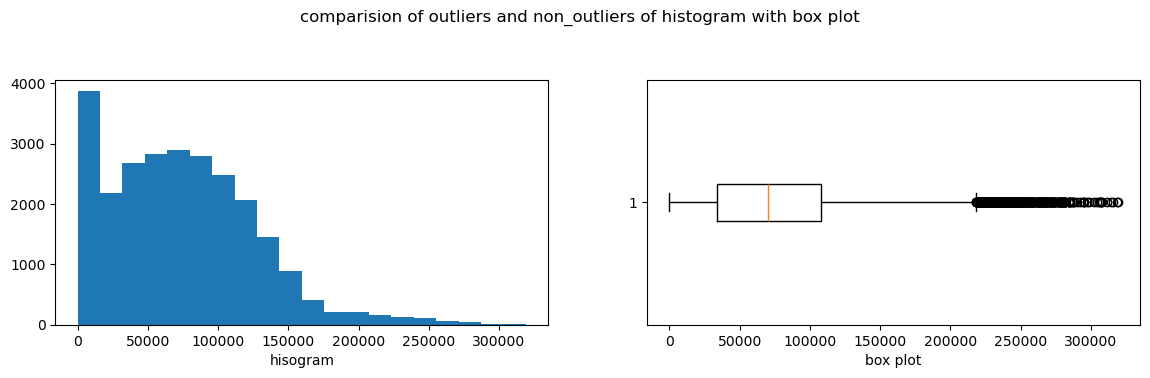

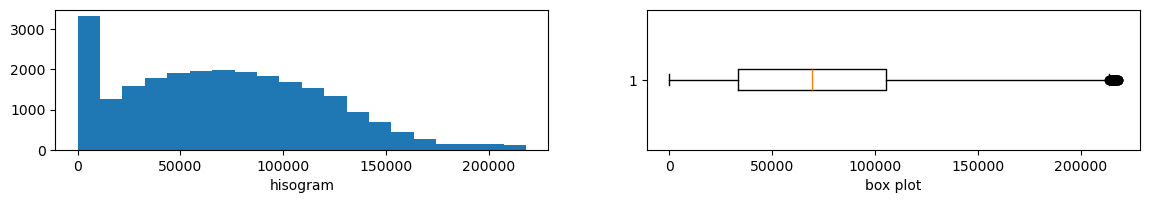

In [9]:
plt.figure(figsize=(14,7))
plt.suptitle("comparision of outliers and non_outliers of histogram with box plot")
####################################all wage data##########################################
plt.subplot(2,2,1).hist(visa_df["prevailing_wage"],bins=20)
plt.xlabel("hisogram")
plt.subplot(2,2,2).boxplot(visa_df["prevailing_wage"],vert=False)
plt.xlabel("box plot")
plt.figure(figsize=(14,4))
####################################non_outliers##########################################
plt.subplot(2,2,3).hist(non_outliers_wagedata,bins=20)
plt.xlabel("hisogram")
plt.subplot(2,2,4).boxplot(non_outliers_wagedata,vert=False)
plt.xlabel("box plot")
plt.show()

**task**
  
- fill the outliers of wage data with wage median
- 427 outliers should be replce with mdin value
- again draw the plot

In [108]:
round(visa_df["prevailing_wage"].median(),2)

70308.21

In [110]:
#outliers
q1=np.percentile(visa_df["prevailing_wage"],25)
q2=np.percentile(visa_df["prevailing_wage"],50)
q3=np.percentile(visa_df["prevailing_wage"],75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
con1=visa_df["prevailing_wage"]<lb
con2=visa_df["prevailing_wage"]>ub
con3=con1 ^ con2
outliers_wagedata=visa_df["prevailing_wage"][con3]
outliers_wagedata

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

**fill the outliers with median**

In [160]:
visa_df.loc[con3, "prevailing_wage"] = round(visa_df["prevailing_wage"].median(),2)
print(visa_df.loc[con3, "prevailing_wage"])#fill value(median)
data_with_fillvalue=visa_df["prevailing_wage"]#total data after fill value 
print(data_with_fillvalue)

14       70308.21
34       70308.21
130      70308.21
216      70308.21
221      70308.21
           ...   
25191    70308.21
25195    70308.21
25468    70308.21
25469    70308.21
25476    70308.21
Name: prevailing_wage, Length: 427, dtype: float64
0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476     70308.2100
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64


**plot with fill value**

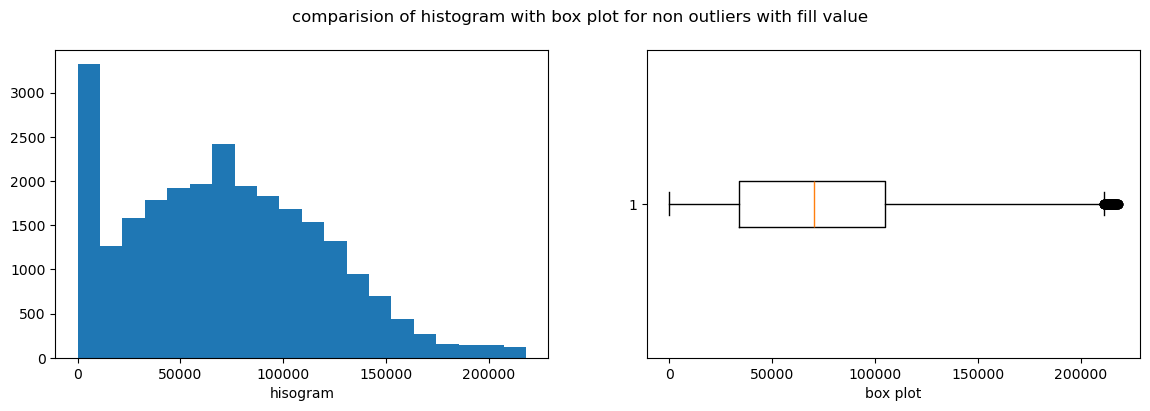

In [161]:
plt.figure(figsize=(14,4))
plt.suptitle("comparision of histogram with box plot for non outliers with fill value")
plt.subplot(1,2,1).hist(data_with_fillvalue,bins=20)
plt.xlabel("hisogram")
plt.subplot(1,2,2).boxplot(data_with_fillvalue,vert=False)
plt.xlabel("box plot")
plt.show()


**comparision of nonoutlieers with dropvalue and fill value**

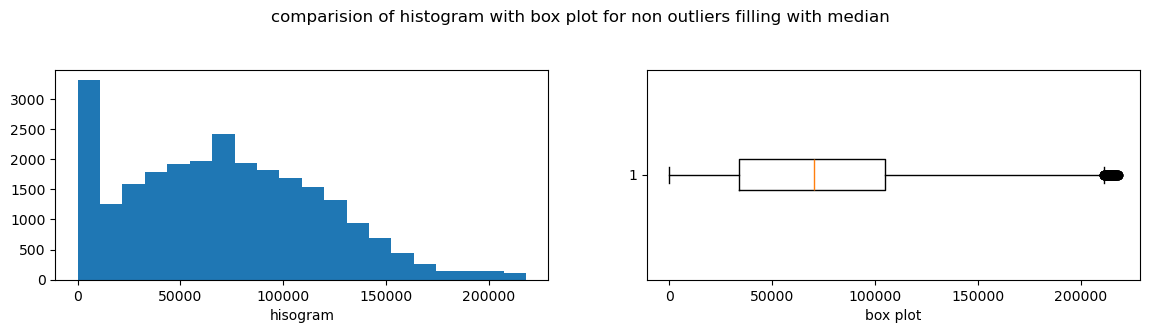

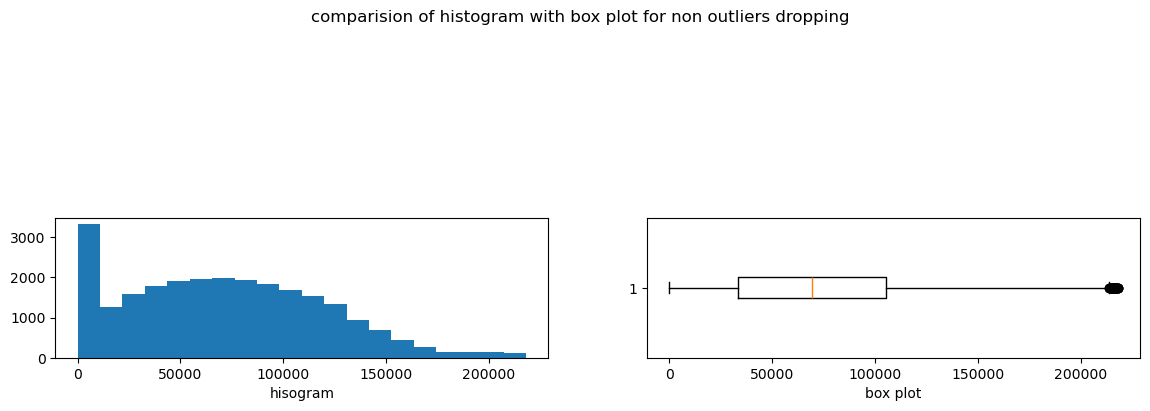

In [172]:
plt.figure(figsize=(14,6))
plt.suptitle("comparision of histogram with box plot for non outliers filling with median")
plt.subplot(2,2,1).hist(data_with_fillvalue,bins=20)
plt.xlabel("hisogram")
plt.subplot(2,2,2).boxplot(data_with_fillvalue,vert=False)
plt.xlabel("box plot")
#plt.show()
plt.figure(figsize=(14,4))
plt.suptitle("comparision of histogram with box plot for non outliers dropping")
plt.subplot(2,2,3).hist(non_outliers_wagedata,bins=20)
plt.xlabel("hisogram")
plt.subplot(2,2,4).boxplot(non_outliers_wagedata,vert=False)
plt.xlabel("box plot")
plt.show()

**comparision of outliers and non_outliers of histogram with box plot with fill value**

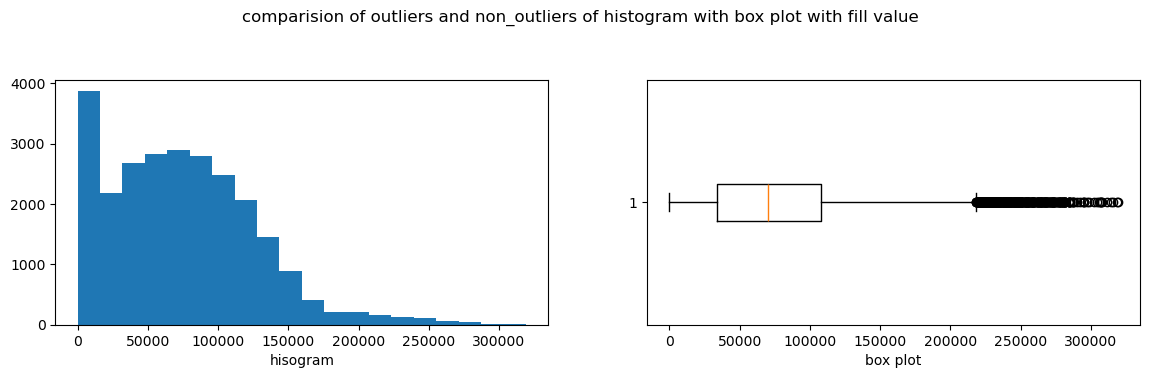

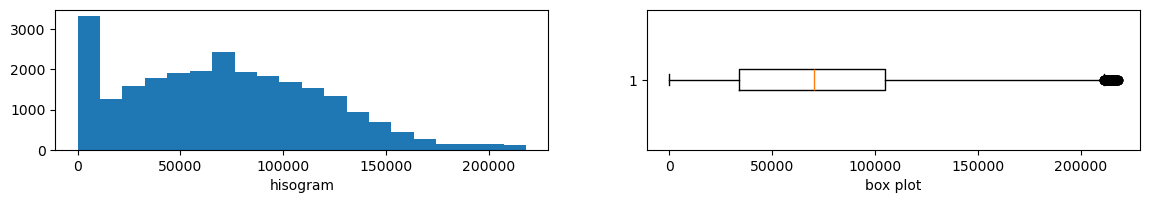

In [173]:
plt.figure(figsize=(14,7))
plt.suptitle("comparision of outliers and non_outliers of histogram with box plot with fill value")
####################################all wage data##########################################
plt.subplot(2,2,1).hist(visa_df["prevailing_wage"],bins=20)
plt.xlabel("hisogram")
plt.subplot(2,2,2).boxplot(visa_df["prevailing_wage"],vert=False)
plt.xlabel("box plot")
plt.figure(figsize=(14,4))
####################################non_outliers##########################################
plt.subplot(2,2,3).hist(data_with_fillvalue,bins=20)
plt.xlabel("hisogram")
plt.subplot(2,2,4).boxplot(data_with_fillvalue,vert=False)
plt.xlabel("box plot")
plt.show()

**plot of outlier and non outlier**

In [10]:
q1=np.percentile(visa_df["prevailing_wage"],25)
q2=np.percentile(visa_df["prevailing_wage"],50)
q3=np.percentile(visa_df["prevailing_wage"],75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
con1=visa_df["prevailing_wage"]<lb
con2=visa_df["prevailing_wage"]>ub
con3=con1 ^ con2
outliers_wagedata=visa_df["prevailing_wage"][con3]
outliers_wagedata

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [11]:
q1=np.percentile(visa_df["prevailing_wage"],25)
q2=np.percentile(visa_df["prevailing_wage"],50)
q3=np.percentile(visa_df["prevailing_wage"],75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
con1=visa_df["prevailing_wage"]>lb
con2=visa_df["prevailing_wage"]<ub
con3=con1 & con2
non_outliers_wagedata=visa_df["prevailing_wage"][con3]
non_outliers_wagedata
#non_outliers=visa_df[con3]
#len(non_outliers)

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

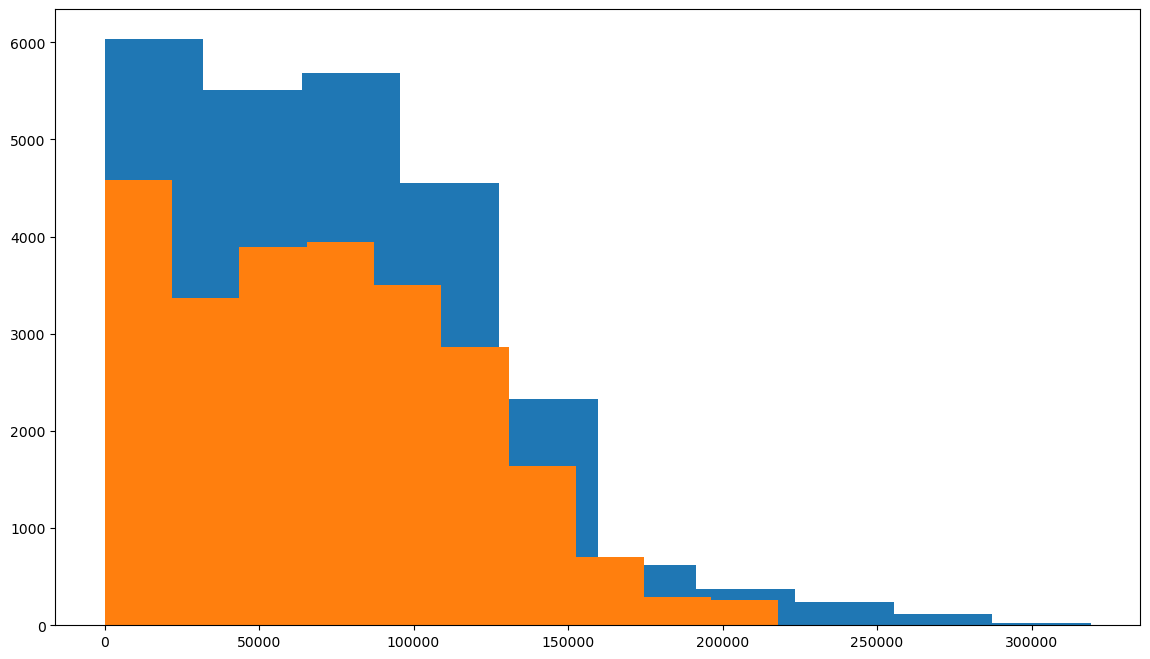

In [12]:
plt.figure(figsize=(14,8))
plt.hist((visa_df["prevailing_wage"]))
plt.hist(non_outliers_wagedata)
plt.show()

**how to deal outlier**

-1. we can drop the outliers

- droping outliers is an easy task,but not recomended

- if u drop the outliers means we are dropping the rows,which means we are droping the other columns values also

- may be some important information we might loose from other column value

- butin industry,if outlier percentege isless then 2% of total data,we can drop

- the no. of total observation is 25480

- the no. of outliers of wage is 427

- thepercentage is 1.67,which is less than 2%.


-2. fill with median values

    - wealreday know that outliers does not affect by median
    
    - so it is the best practice to fill the utlier with mdian
    
-3.capping or florring

   - instead of fill with median,we can fill with certain value.

   - the outliers which is less than lb fill with lb value
     
   - the outliers which is greater than ub fill with ub value
     
- **isolation forest**

- it is an ml model used to find the outliers and anamolies

**fill with median value**

In [13]:
round(visa_df["prevailing_wage"].median(),2)

70308.21

In [23]:
visa_df.loc[con3, "prevailing_wage"] = round(visa_df["prevailing_wage"].median(),2)
print(visa_df.loc[con3, "prevailing_wage"])#fill value(median)
data_fill_with_median=visa_df["prevailing_wage"]#total data after fill value 
#print(data_fill_with_median)

0        70308.21
1        70308.21
2        70308.21
3        70308.21
4        70308.21
           ...   
25474    70308.21
25475    70308.21
25477    70308.21
25478    70308.21
25479    70308.21
Name: prevailing_wage, Length: 25053, dtype: float64


**np.where**

- in numpy we have a mthod called where

- it takes 3 arguments
 - 1.condition
 - 2.value if conditionis true
 - 3. value if condition is false
- it is applicable for binary means,if and else

[592.2029,
 83425.65,
 122996.86,
 83434.03,
 149907.39,
 78252.14,
 53635.39,
 418.2298,
 74362.19,
 67514.76,
 83588.56,
 70813.09,
 28663.05,
 107196.03,
 70308.20999999999,
 74108.02,
 3706.79,
 16132.61,
 150441.13,
 79948.12,
 71128.98,
 137694.98,
 45642.39,
 90108.38,
 71286.04,
 99489.65,
 86332.95,
 103029.33,
 40925.86,
 189190.48,
 79594.12,
 135866.13,
 72077.57,
 81921.18,
 70308.20999999999,
 92421.92,
 2490.12,
 110817.26,
 50960.01,
 125336.9,
 39633.32,
 156326.33,
 43630.58,
 54614.42,
 28989.87,
 22924.91,
 61567.75,
 156251.17,
 86022.02,
 49565.37,
 66191.41,
 95623.2,
 115014.05,
 35018.04,
 230.8072,
 113799.64,
 85854.09,
 14174.04,
 47176.84,
 4949.28,
 67410.59,
 58791.58,
 103.2216,
 62591.57,
 102919.59,
 123468.56,
 82324.64,
 5319.49,
 153019.94,
 38059.89,
 230.327,
 61521.92,
 121316.5,
 122540.55,
 47170.76,
 330.3743,
 2927.34,
 107781.48,
 590.0203,
 194176.83,
 102073.81,
 113882.38,
 70778.82,
 84125.48,
 174014.59,
 34213.17,
 79813.05,
 113327.34

In [48]:
dict={"sub":["ds","de","cs"],"marks":[100,200,300]}
df=pd.DataFrame(dict)
print(df)
#i want to replace marks with 1,which is greater than 100
l=[]
for i in df.marks:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df["marks"]=l
df

  sub  marks
0  ds    100
1  de    200
2  cs    300


,sub,marks
0,ds,100
1,de,1
2,cs,1


**using np.where method**
- np.where(condition>,<true>,<false>)

In [50]:
dict={"sub":["ds","de","cs"],"marks":[100,200,300]}
df=pd.DataFrame(dict)
print(df)
#using np.where() method
con=df["marks"]>100
l=np.where(con,1,df["marks"])
df["marks"]=l
df

  sub  marks
0  ds    100
1  de    200
2  cs    300


,sub,marks
0,ds,100
1,de,1
2,cs,1


In [39]:
con=df["marks"]>100
l=np.where(con,1,df["marks"])
df["marks"]=l
df

,sub,marks
0,ds,100
1,de,1
2,cs,1


In [52]:
#by using normal for loop
list=[]
for value in visa_df["prevailing_wage"]:
    if value<lb or value>ub:
        list.append(visa_df["prevailing_wage"].median())
    else:
        list.append(value)

In [51]:
#implement for outlier using np.where
wage_data=visa_df["prevailing_wage"]
con1=wage_data<lb
con2=wage_data>ub
con3=con1^con2
wage_med=wage_data.median()
l=np.where(con3,wage_med,wage_data)
visa_df["prevailing_wage_update"]=l
visa_df["prevailing_wage_update"]

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476     70308.2100
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage_update, Length: 25480, dtype: float64

(array([3320., 1260., 1581., 1787., 1921., 1969., 2424., 1945., 1826.,
        1681., 1534., 1326.,  946.,  697.,  442.,  264.,  153.,  142.,
         144.,  118.]),
 array([2.13670000e+00, 1.09067604e+04, 2.18113840e+04, 3.27160077e+04,
        4.36206314e+04, 5.45252550e+04, 6.54298787e+04, 7.63345024e+04,
        8.72391260e+04, 9.81437497e+04, 1.09048373e+05, 1.19952997e+05,
        1.30857621e+05, 1.41762244e+05, 1.52666868e+05, 1.63571492e+05,
        1.74476115e+05, 1.85380739e+05, 1.96285363e+05, 2.07189986e+05,
        2.18094610e+05]),
 <BarContainer object of 20 artists>)

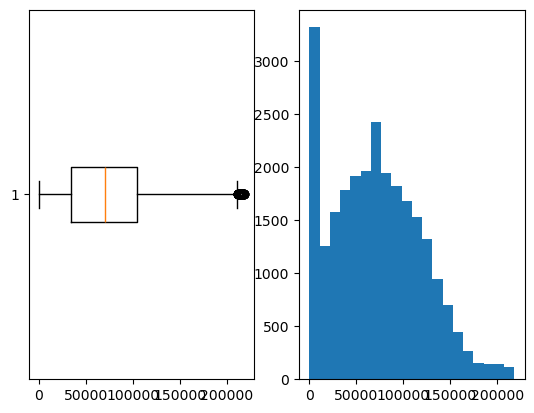

In [44]:
plt.subplot(1,2,1).boxplot(visa_df["prevailing_wage_update"],vert=False)
plt.subplot(1,2,2).hist(visa_df["prevailing_wage_update"],bins=20)

**outliers replaced by lb and ub**

In [58]:
#by using normal for loop
list=[]
for value in visa_df["prevailing_wage"]:
    if value<lb:
        value=lb
        list.append(value)
    else:
        value=ub
        list.append(value)
visa_df["value_with_lb_ub"]=list

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 25480.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([218315.06125, 218315.11125, 218315.16125, 218315.21125,
        218315.26125, 218315.31125, 218315.36125, 218315.41125,
        218315.46125, 218315.51125, 218315.56125, 218315.61125,
        218315.66125, 218315.71125, 218315.76125, 218315.81125,
        218315.86125, 218315.91125, 218315.96125, 218316.01125,
        218316.06125]),
 <BarContainer object of 20 artists>)

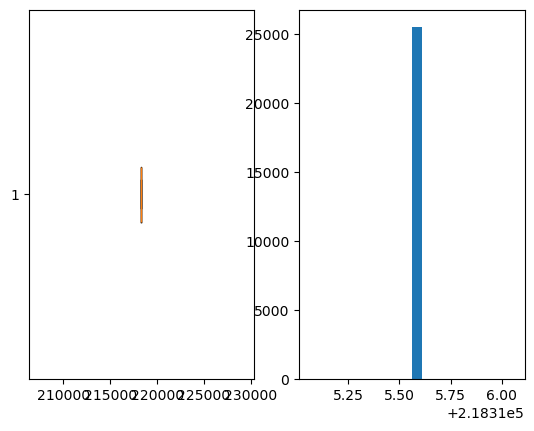

In [60]:
plt.subplot(1,2,1).boxplot(visa_df["value_with_lb_ub"],vert=False)
plt.subplot(1,2,2).hist(visa_df["value_with_lb_ub"],bins=20)

In [ ]:
wage_data=visa_df["prevailing_wage"]
con1=wage_data<lb
con2=wage_data>ub
con3=con1^con2
wage_med=wage_data.median()
l=np.where(con3,wage_med,wage_data)
visa_df["prevailing_wage_update"]=l
visa_df["prevailing_wage_update"]